In [3]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 35.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 740.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 974.1 kB/s eta 0:00:0000:01:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 251.5 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
bin_data = pd.read_csv('datasets/bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
le1_classes_ = np.load('labels/le1_classes.npy',allow_pickle=True)
le2_classes_ = np.load('labels/le2_classes.npy',allow_pickle=True)

# **Linear Support Vector Machine Classifier (Binary Classification)**

In [6]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [7]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [8]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [9]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [10]:
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

In [11]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69460849685655


In [12]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **K-nearest-neighbor Classifier (Binary Classification)**

In [13]:
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [15]:
pkl_filename = "./models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [16]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.58068203467327


In [17]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



# **Linear Discriminant Analysis Classifier (Binary Classification)**

In [18]:
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [20]:
pkl_filename = "./models/lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

In [21]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [22]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **Quadratic Discriminant Analysis Classifier (Binary Classification)**

In [23]:
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [24]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [25]:
pkl_filename = "./models/qda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [26]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  70.89921889883787


In [27]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.38      0.55     14720
      normal       0.65      1.00      0.79     16774

    accuracy                           0.71     31494
   macro avg       0.82      0.69      0.67     31494
weighted avg       0.81      0.71      0.67     31494



# **Multi Layer Perceptron Classifier (Binary Classification)**

In [28]:
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [29]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [30]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [31]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [32]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# summary of model layers
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4751 (18.56 KB)
Trainable params: 4751 (18.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.5843 - accuracy: 0.7689 - val_loss: 0.4558 - val_accuracy: 0.9048
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3898 - accuracy: 0.9089 - val_loss: 0.3212 - val_accuracy: 0.9146
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2853 - accuracy: 0.9143 - val_loss: 0.2475 - val_accuracy: 0.9181
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2263 - accuracy: 0.9184 - val_loss: 0.2045 - val_accuracy: 0.9300
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1905 - accuracy: 0.9375 - val_loss: 0.1773 - val_accuracy: 0.9479
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1668 - accuracy: 0.9517 - val_loss: 0.1588 - val_accuracy: 0.9563
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1504 - accuracy: 0.9586 - val_loss: 0.1458 - val_accuracy: 0.9605
Epoch 8/100


In [35]:
filepath = './models/mlp_binary.json'
weightspath = './weights/mlp_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [36]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

985/985 [==============================] - 1s 529us/step - loss: 0.0637 - accuracy: 0.9782
Test results - Loss: 0.06370073556900024 - Accuracy: 97.82180786132812


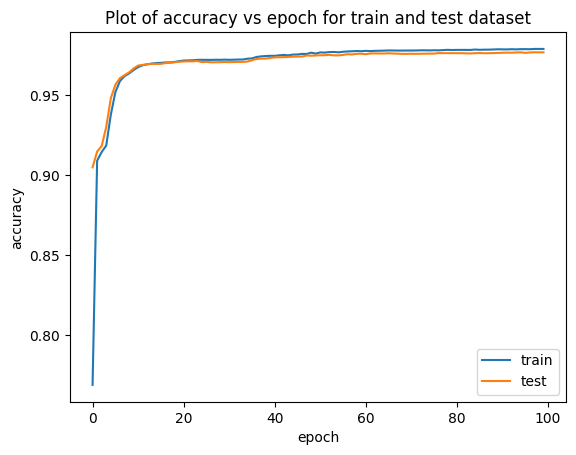

In [39]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_accuracy.png')
plt.show()

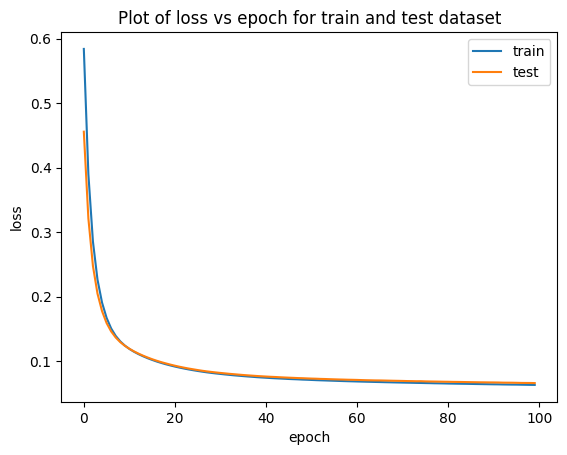

In [40]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_loss.png')
plt.show()

In [42]:
%pip install pydot


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
# representation of model layers
from keras.utils import plot_model
plot_model(mlp, to_file='plots/mlp_binary.png', show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# **Long Short-Term Memory Classifier (Binary Classification)**

In [ ]:
# importing library for LSTM layers
from keras.layers import LSTM

In [ ]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
lst = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
lst.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# summary of model layers
lst.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 93, 50)            10400     
_________________________________________________________________
dense_1 (Dense)              (None, 93, 1)             51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 29s 2s/step - loss: 0.6915 - accuracy: 0.5119 - val_loss: 0.6863 - val_accuracy: 0.5798
Epoch 2/100
16/16 [==============================] - 26s 2s/step - loss: 0.6487 - accuracy: 0.6194 - val_loss: 0.4693 - val_accuracy: 0.8163
Epoch 3/100
16/16 [==============================] - 25s 2s/step - loss: 0.4611 - accuracy: 0.8119 - val_loss: 0.4278 - val_accuracy: 0.8231
Epoch 4/100
16/16 [==============================] - 25s 2s/step - loss: 0.4374 - accuracy: 0.8158 - val_loss: 0.4351 - val_accuracy: 0.8118
Epoch 5/100
16/16 [==============================] - 25s 2s/step - loss: 0.4359 - accuracy: 0.8105 - val_loss: 0.4117 - val_accuracy: 0.8281
Epoch 6/100
16/16 [==============================] - 25s 2s/step - loss: 0.4162 - accuracy: 0.8260 - val_loss: 0.4076 - val_accuracy: 0.8300
Epoch 7/100
16/16 [==============================] - 25s 2s/step - loss: 0.4156 - accuracy: 0.8265 - val_loss: 0.4064 - val_accuracy: 0.8305
Epoch 8/100
1

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
filepath = './models/lst_binary.json'
weightspath = './weights/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 10s 10ms/step - loss: 0.3087 - accuracy: 0.8306
Test results - Loss: 0.3086586892604828 - Accuracy: 83.05730819702148%


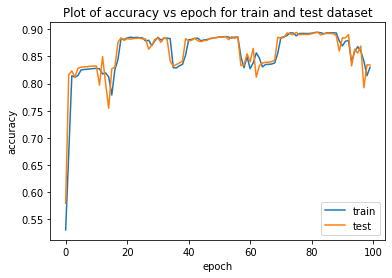

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

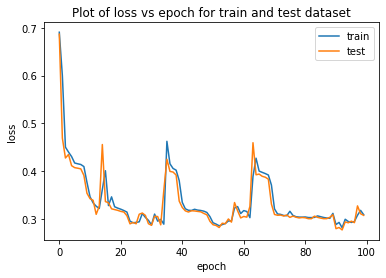

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_loss.png')
plt.show()

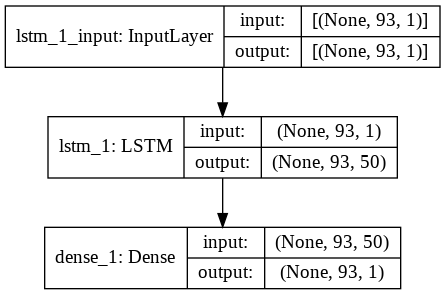

In [ ]:
# representation of model layers
plot_model(lst, to_file='plots/lstm_binary.png', show_shapes=True,)

# **Auto Encoder Classifier (Binary Classification)**

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [ ]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 93)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                4700      
_________________________________________________________________
dense_5 (Dense)              (None, 93)                4743      
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1214 - accuracy: 0.0525 - val_loss: 0.1063 - val_accuracy: 0.4071
Epoch 2/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.6072 - val_loss: 0.1051 - val_accuracy: 0.6891
Epoch 3/100
189/189 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.7082 - val_loss: 0.1049 - val_accuracy: 0.7015
Epoch 4/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1048 - accuracy: 0.7324 - val_loss: 0.1048 - val_accuracy: 0.7213
Epoch 5/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.7678 - val_loss: 0.1047 - val_accuracy: 0.8029
Epoch 6/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1043 - accuracy: 0.8180 - val_loss: 0.1047 - val_accuracy: 0.8578
Epoch 7/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1044 - accuracy: 0.8400 - val_loss: 0.1047 - val_accuracy: 0.8321

In [ ]:
filepath = './models/ae_binary.json'
weightspath = './weights/ae_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

985/985 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9203
Test results - Loss: 0.10457229614257812 - Accuracy: 0.9226519465446472%


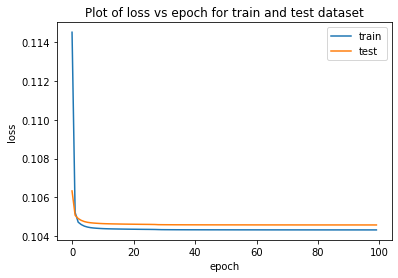

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_binary_loss.png')
plt.show()

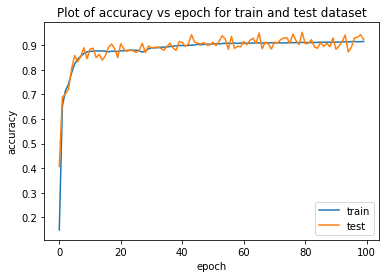

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_binary_accuracy.png')
plt.show()

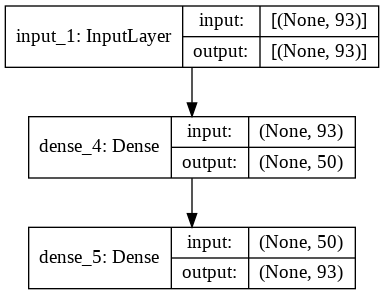

In [ ]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_binary.png', show_shapes=True,)

In [ ]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [ ]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104572,0.532609
std,0.043577,0.498943
min,0.040633,0.000000
25%,0.074506,0.000000
50%,0.083821,1.000000
75%,0.151405,1.000000
max,0.229802,1.000000
